In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/kaggle/input/google-play-store-apps/googleplaystore.csv")

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
df = df.dropna(subset=['App'])

In [6]:
df['Rating'] = df['Rating'].fillna(df['Rating'].median())

In [7]:
df['Type'] = df['Type'].fillna(df['Type'].mode()[0])

In [8]:
df['Content Rating'] = df['Content Rating'].fillna(df['Content Rating'].mode()[0])

In [9]:
df['Android Ver'] = df['Android Ver'].fillna(df['Android Ver'].mode()[0])

In [10]:
df['Current Ver'] = df['Current Ver'].fillna("Unknown")

In [11]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [12]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [13]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

In [14]:
df['Size'] = df['Size'].replace('Varies with device', None)

In [15]:
df['Size'] = df['Size'].str.replace('M', '')

In [16]:
df['Size'] = df['Size'].str.replace('k', '')

In [17]:
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

In [18]:
df['Installs'] = df['Installs'].str.replace('+', '')

In [19]:
df['Installs'] = df['Installs'].str.replace(',', '')

In [20]:
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

In [21]:
df['Price'] = df['Price'].str.replace('$', '')

In [22]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [23]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

In [24]:
df['Android Ver'] = df['Android Ver'].str.replace('and up', '')

In [25]:
df['Android Ver'] = pd.to_numeric(df['Android Ver'], errors='coerce')

In [26]:
df['Current Ver'] = df['Current Ver'].astype(str)

In [27]:
df['Android Ver'] = df['Android Ver'].astype(str)

In [28]:
df.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                  float64
Size                     float64
Installs                 float64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

In [29]:
df.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              1
Size              1696
Installs             1
Type                 0
Price                1
Content Rating       0
Genres               0
Last Updated         1
Current Ver          0
Android Ver          0
dtype: int64

In [30]:
df['Reviews'] = df['Reviews'].fillna(df['Reviews'].median())

In [31]:
df['Installs'] = df['Installs'].fillna(df['Installs'].median())

In [32]:
df['Price'] = df['Price'].fillna(0)

In [33]:
df['Last Updated'] = df['Last Updated'].fillna(df['Last Updated'].mode()[0])

In [34]:
df.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1696
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [37]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          10841 non-null  float64       
 3   Reviews         10841 non-null  float64       
 4   Size            9145 non-null   float64       
 5   Installs        10841 non-null  float64       
 6   Type            10841 non-null  object        
 7   Price           10841 non-null  float64       
 8   Content Rating  10841 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10841 non-null  datetime64[ns]
 11  Current Ver     10841 non-null  object        
 12  Android Ver     10841 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 1.1+ MB


In [35]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
App,10841,9660,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,10841,34,FAMILY,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,10841.0,NaN,NaN,NaN,4.207841,1.0,4.1,4.3,4.5,19.0,0.500893
Reviews,10841.0,NaN,NaN,NaN,444112.119454,0.0,38.0,2094.0,54768.0,78158306.0,2927628.635005
Size,9145.0,NaN,NaN,NaN,37.03544,1.0,5.6,15.0,34.0,1020.0,98.873769
Installs,10841.0,NaN,NaN,NaN,15462921.638871,0.0,1000.0,100000.0,5000000.0,1000000000.0,85025567.336378
Type,10841,3,Free,10040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10841.0,NaN,NaN,NaN,1.027273,0.0,0.0,0.0,0.0,400.0,15.948971
Content Rating,10841,6,Everyone,8715,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,10841,120,Tools,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df.to_csv('/kaggle/working/cleaned_googleplaystore.csv', index=False)


**Basic Level Questions**

**1.What is the average rating of apps in the dataset?**


In [37]:
avg_rating = df['Rating'].mean()

In [38]:
print(f"Average app rating: {avg_rating:.2f}")

Average app rating: 4.21


**2.How many unique categories of apps are there?**

In [39]:
unique_categories_count = df['Category'].nunique()

In [40]:
unique_categories = df['Category'].unique()

In [41]:
print(f"Number of unique categories: {unique_categories_count}")

Number of unique categories: 34


In [42]:
print("Categories:", unique_categories)

Categories: ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


**3.What is the distribution of app sizes?**


In [43]:
print("Minimum App Size:", df['Size'].min(), "MB")

Minimum App Size: 1.0 MB


In [44]:
print("Maximum App Size:", df['Size'].max(), "MB")

Maximum App Size: 1020.0 MB


In [45]:
print("Average App Size:", round(df['Size'].mean(), 2), "MB")

Average App Size: 37.04 MB


In [46]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [47]:
numeric_cols = ['Size', 'Rating', 'Reviews', 'Installs', 'Price']

In [48]:
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

In [49]:
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')


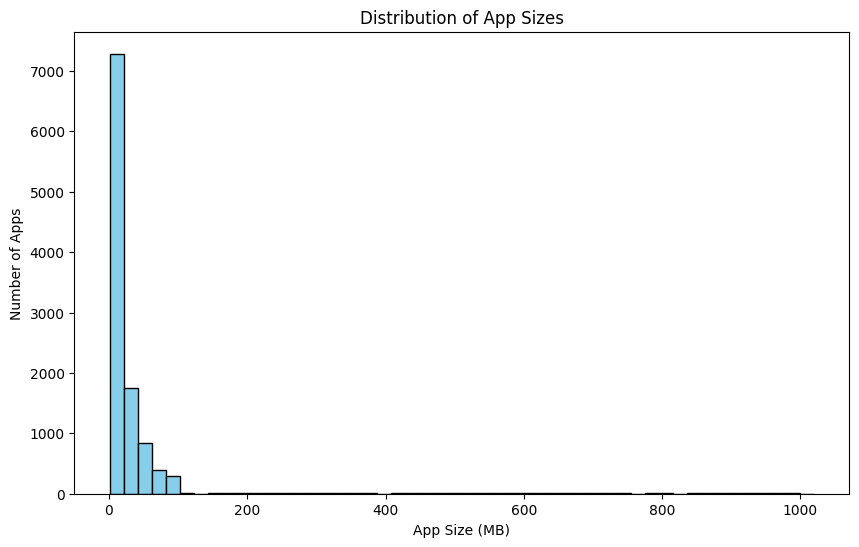

In [50]:
plt.figure(figsize=(10,6))
plt.hist(df['Size'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of App Sizes')
plt.xlabel('App Size (MB)')
plt.ylabel('Number of Apps')
plt.show()


4.How many free vs paid apps are there?


In [51]:
type_counts = df['Type'].value_counts()

In [52]:
print(type_counts)

Type
Free    10040
Paid      800
0           1
Name: count, dtype: int64


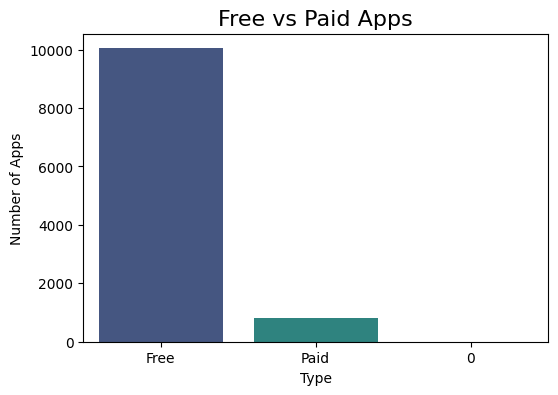

In [53]:
plt.figure(figsize=(6,4))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')
plt.title('Free vs Paid Apps', fontsize=16)
plt.xlabel('Type')
plt.ylabel('Number of Apps')
plt.show()

**5.What is the most common content rating for apps?**


In [54]:
content_counts = df['Content Rating'].value_counts()

In [55]:
print(content_counts)

Content Rating
Everyone           8715
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: count, dtype: int64


In [56]:
most_common_rating = df['Content Rating'].mode()[0]

In [57]:
print("Most Common Content Rating:", most_common_rating)

Most Common Content Rating: Everyone


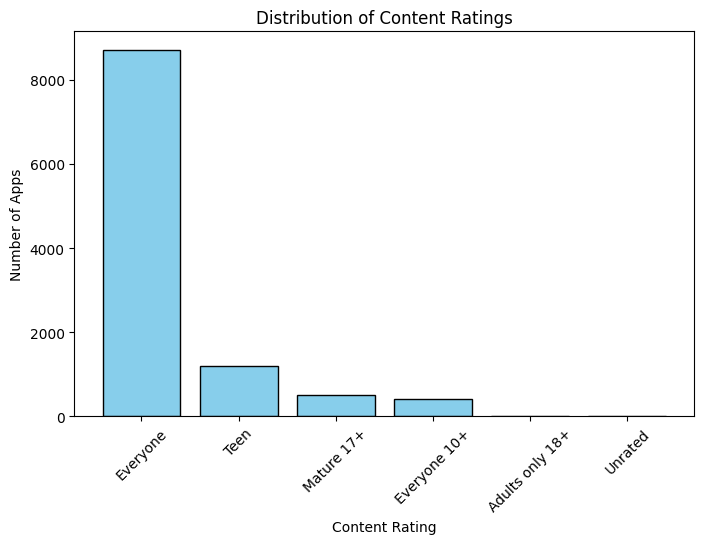

In [58]:
plt.figure(figsize=(8,5))
plt.bar(content_counts.index, content_counts.values, color='skyblue', edgecolor='black')
plt.title('Distribution of Content Ratings')
plt.xlabel('Content Rating')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45)
plt.show()

**6.What are the top 5 most installed apps?**


In [59]:
top_installed = df.sort_values(by='Installs', ascending=False).head(5)

In [60]:
print(top_installed[['App', 'Installs']])

                                           App      Installs
3896                            Subway Surfers  1.000000e+09
3943                                  Facebook  1.000000e+09
335   Messenger – Text and Video Chat for Free  1.000000e+09
3523                              Google Drive  1.000000e+09
3565                              Google Drive  1.000000e+09


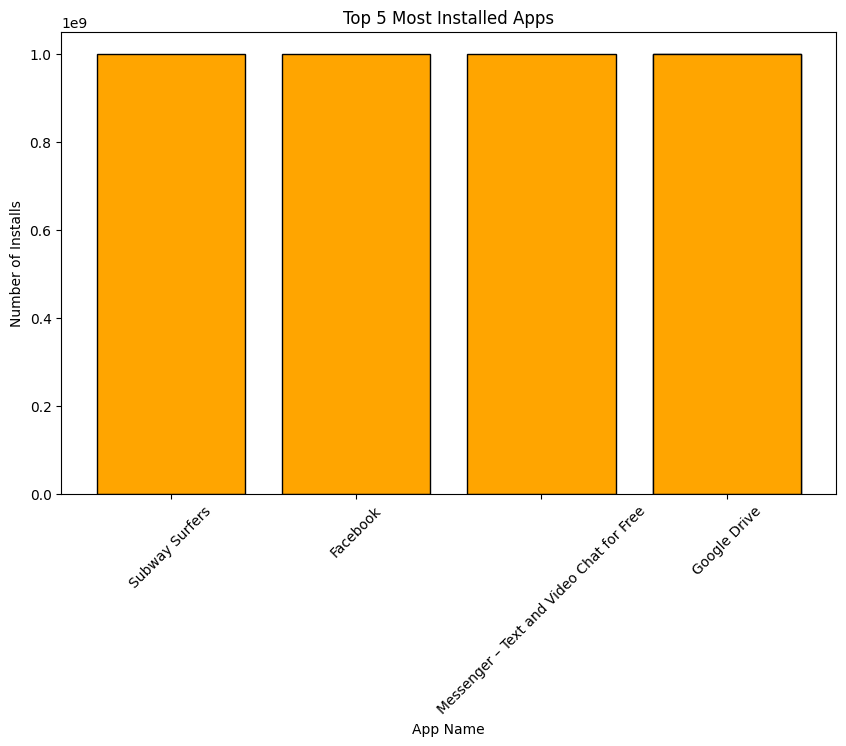

In [61]:
plt.figure(figsize=(10,6))
plt.bar(top_installed['App'], top_installed['Installs'], color='orange', edgecolor='black')
plt.title('Top 5 Most Installed Apps')
plt.xlabel('App Name')
plt.ylabel('Number of Installs')
plt.xticks(rotation=45)
plt.show()

**7.How many apps have a rating of 4.0 and above?**


In [62]:
high_rating_apps = df[df['Rating'] >= 4.0]

In [63]:
num_high_rating = high_rating_apps.shape[0]

In [64]:
print("Number of apps with rating 4.0 and above:", num_high_rating)

Number of apps with rating 4.0 and above: 8843


**8.What is the average number of reviews for free vs paid apps?**


In [65]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

In [66]:
df_clean = df.dropna(subset=['Reviews'])

In [67]:
avg_reviews = df_clean.groupby('Type')['Reviews'].mean().round(2)

In [68]:
print(avg_reviews)

Type
0         2094.00
Free    478613.42
Paid     11673.31
Name: Reviews, dtype: float64


**9.What is the average app size for each category?**

In [70]:
avg_size_per_category = df.groupby('Category')['Size'].mean().sort_values(ascending=False)


In [71]:
print(avg_size_per_category)

Category
LIBRARIES_AND_DEMO     174.981176
TOOLS                   43.733215
COMMUNICATION           42.928941
MEDICAL                 42.648380
GAME                    42.324476
PERSONALIZATION         40.045153
BOOKS_AND_REFERENCE     36.618615
FAMILY                  36.374290
HEALTH_AND_FITNESS      32.944282
AUTO_AND_VEHICLES       32.208235
COMICS                  31.245000
PRODUCTIVITY            29.741745
LIFESTYLE               29.690052
SPORTS                  29.153385
SHOPPING                28.054231
MAPS_AND_NAVIGATION     27.859854
FINANCE                 26.654918
EDUCATION               26.049359
BUSINESS                25.106522
HOUSE_AND_HOME          23.203409
TRAVEL_AND_LOCAL        23.203101
SOCIAL                  22.981017
PARENTING               21.761667
WEATHER                 20.786585
FOOD_AND_DRINK          20.657480
VIDEO_PLAYERS           20.264571
PHOTOGRAPHY             19.738507
EVENTS                  19.290625
ENTERTAINMENT           19.139597
DATIN

**10.How many apps were last updated in 2018?**


In [72]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

In [73]:
apps_2018 = df[df['Last Updated'].dt.year == 2018]

In [74]:
count_2018 = apps_2018.shape[0]

In [75]:
print("Number of apps last updated in 2018:", count_2018)

Number of apps last updated in 2018: 7350


**Medium Level Questions**

**1.What is the correlation between the number of installs and the app rating?**


In [78]:
df['Installs'] = df['Installs'].replace(r'[+,]', '', regex=True).astype(float)

In [79]:
corr_df = df[['Installs', 'Rating']].dropna()

In [80]:
correlation = corr_df['Installs'].corr(corr_df['Rating'])


In [81]:
print("Correlation between Installs and Rating:", correlation)

Correlation between Installs and Rating: 0.043134789466308325


**2.Which app categories have the highest average rating?**


In [82]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

In [83]:
avg_rating_per_category = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)


In [84]:
print(avg_rating_per_category)


Category
1.9                    19.000000
EVENTS                  4.395313
EDUCATION               4.388462
ART_AND_DESIGN          4.355385
BOOKS_AND_REFERENCE     4.335498
PERSONALIZATION         4.328827
PARENTING               4.300000
GAME                    4.286888
BEAUTY                  4.283019
HEALTH_AND_FITNESS      4.280059
SHOPPING                4.263077
SOCIAL                  4.261017
WEATHER                 4.248780
SPORTS                  4.236458
PRODUCTIVITY            4.226651
MEDICAL                 4.216199
HOUSE_AND_HOME          4.211364
LIBRARIES_AND_DEMO      4.207059
AUTO_AND_VEHICLES       4.205882
FAMILY                  4.204564
PHOTOGRAPHY             4.197910
FOOD_AND_DRINK          4.185827
BUSINESS                4.182391
COMMUNICATION           4.180103
NEWS_AND_MAGAZINES      4.161837
COMICS                  4.160000
FINANCE                 4.151639
TRAVEL_AND_LOCAL        4.132946
LIFESTYLE               4.131414
ENTERTAINMENT           4.126174
V

In [85]:
top5_categories = avg_rating_per_category.head(5)
print(top5_categories)


Category
1.9                    19.000000
EVENTS                  4.395313
EDUCATION               4.388462
ART_AND_DESIGN          4.355385
BOOKS_AND_REFERENCE     4.335498
Name: Rating, dtype: float64


**3.How does the price of an app affect its average rating?**


In [91]:
paid_apps = df[df['Type'] == 'Paid']

In [92]:
avg_rating_per_price = paid_apps.groupby('Price')['Rating'].mean().sort_index()

In [93]:
print(avg_rating_per_price)

Price
0.99      4.298649
1.00      4.400000
1.04      4.300000
1.20      4.200000
1.26      4.300000
            ...   
379.99    2.900000
389.99    3.600000
394.99    4.300000
399.99    4.033333
400.00    3.600000
Name: Rating, Length: 91, dtype: float64


**4.What is the distribution of app ratings across different content ratings?**


In [97]:
df['Content Rating'] = df['Content Rating'].astype(str)  


In [98]:
df_clean = df.dropna(subset=['Rating', 'Content Rating'])

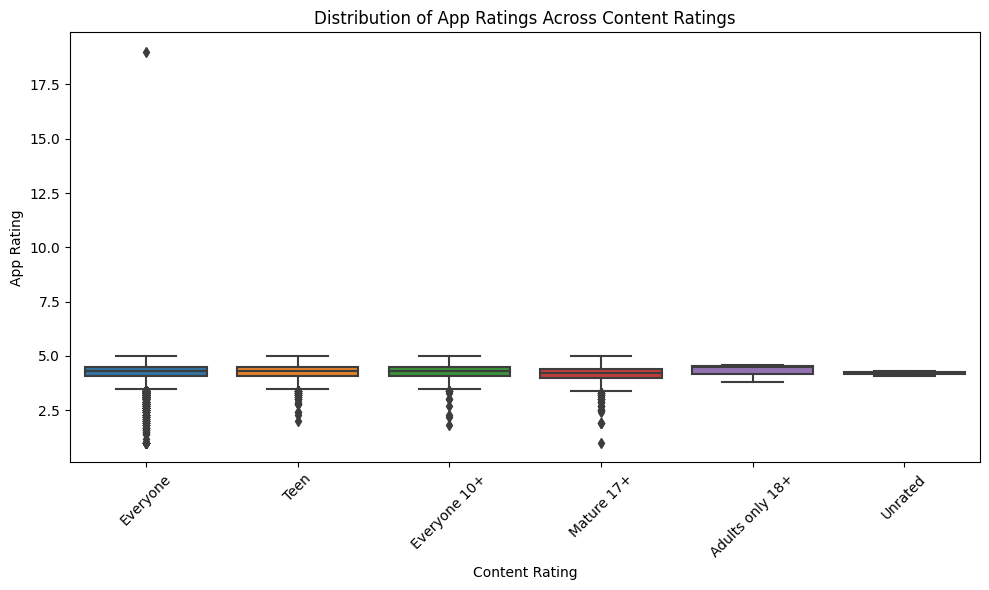

In [101]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Content Rating', y='Rating', data=df_clean)

plt.title('Distribution of App Ratings Across Content Ratings')
plt.xlabel('Content Rating')
plt.ylabel('App Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

5.Which genres have the most apps with over 1 million installs?


In [102]:
df['Installs'] = pd.to_numeric(df['Installs'].astype(str).str.replace('+', '').str.replace(',', ''), errors='coerce')

In [103]:
high_install_apps = df[df['Installs'] > 1_000_000]


In [104]:
genre_counts = high_install_apps.groupby('Genres').size().reset_index(name='App Count')


In [105]:
genre_counts = genre_counts.sort_values(by='App Count', ascending=False)


In [106]:
print(genre_counts.head(10))

           Genres  App Count
0          Action        190
79          Tools        187
61    Photography        172
25  Communication        167
62   Productivity        138
76         Sports        134
39  Entertainment        124
75         Social        121
72       Shopping        116
5          Arcade        115


6.How frequently do apps get updated? Calculate the average time between updates.


In [107]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

In [108]:
df_sorted = df.sort_values(by=['App', 'Last Updated'])

In [109]:
df_sorted['Update_Diff'] = df_sorted.groupby('App')['Last Updated'].diff()

In [110]:
average_update_time = df_sorted['Update_Diff'].mean()

In [111]:
print("Average time between updates:", average_update_time)

Average time between updates: 4 days 15:46:10.872142252


7.What is the impact of app size on the number of installs?


In [112]:
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

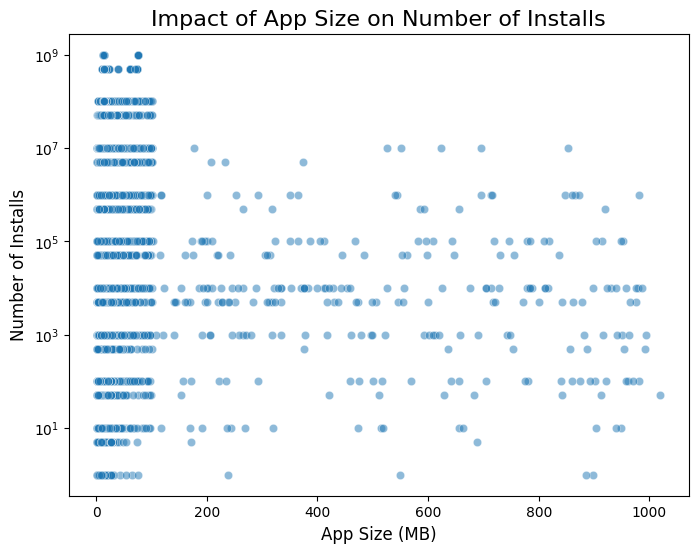

In [114]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Size', y='Installs', data=df, alpha=0.5)

plt.title('Impact of App Size on Number of Installs', fontsize=16)
plt.xlabel('App Size (MB)', fontsize=12)
plt.ylabel('Number of Installs', fontsize=12)
plt.yscale('log')  # Use log scale for installs for better visibility
plt.show()


8.Which apps have the highest number of reviews, and what are their ratings?

In [115]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

In [116]:
top_reviewed_apps = df.sort_values(by='Reviews', ascending=False)[['App', 'Reviews', 'Rating']].head(10)


In [117]:
print(top_reviewed_apps)

                                           App     Reviews  Rating
2544                                  Facebook  78158306.0     4.1
3943                                  Facebook  78128208.0     4.1
381                         WhatsApp Messenger  69119316.0     4.4
336                         WhatsApp Messenger  69119316.0     4.4
3904                        WhatsApp Messenger  69109672.0     4.4
2604                                 Instagram  66577446.0     4.5
2611                                 Instagram  66577313.0     4.5
2545                                 Instagram  66577313.0     4.5
3909                                 Instagram  66509917.0     4.5
382   Messenger – Text and Video Chat for Free  56646578.0     4.0


9.How does the content rating distribution differ between free and paid apps?

In [118]:
content_rating_distribution = pd.crosstab(df['Content Rating'], df['Type'])

In [119]:
print(content_rating_distribution)


Type             0  Free  Paid
Content Rating                
Adults only 18+  0     3     0
Everyone         1  8019   695
Everyone 10+     0   381    33
Mature 17+       0   479    20
Teen             0  1156    52
Unrated          0     2     0


10.What are the top 5 categories with the most installs?


In [121]:
top5_categories = df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(5)

In [122]:
print(top5_categories)


Category
GAME             3.508602e+10
COMMUNICATION    3.264728e+10
PRODUCTIVITY     1.417609e+10
SOCIAL           1.406987e+10
TOOLS            1.145277e+10
Name: Installs, dtype: float64


**Adavnced Level Questions**

1.What are the top 10 apps with the highest ratings, and how do their number of reviews and installs compare?


In [123]:
df['Installs'] = df['Installs'].replace('[+,]', '', regex=True).astype(float)


In [124]:
top_10_rated = df_clean[df_clean['Reviews'] > 100]

In [125]:
top_10_rated = top_10_rated.sort_values(by=['Rating', 'Reviews'], ascending=[False, False]).head(10)

In [126]:
top_10_rated = top_10_rated[['App', 'Rating', 'Reviews', 'Installs']]

In [127]:
print(top_10_rated)

                                                     App  Rating   Reviews  \
10472            Life Made WI-Fi Touchscreen Photo Frame    19.0    2094.0   
10357                                         Ríos de Fe     5.0     141.0   
10301  FD Calculator (EMI, SIP, RD & Loan Eligilibility)     5.0     104.0   
8058                                          Oración CX     5.0     103.0   
9625                                          JW Library     4.9  922752.0   
1260                   Six Pack in 30 Days - Abs Workout     4.9  272337.0   
4854                   Six Pack in 30 Days - Abs Workout     4.9  272172.0   
79                               Tickets + PDA 2018 Exam     4.9  197136.0   
712       Learn Japanese, Korean, Chinese Offline & Free     4.9  133136.0   
2344                                      Period Tracker     4.9  100082.0   

         Installs  
10472    100000.0  
10357      1000.0  
10301      1000.0  
8058       5000.0  
9625   10000000.0  
1260   10000000.0  
4

2.Analyze the trend of app updates over time. Are there any noticeable patterns or seasonal trends?


In [128]:
df['Year_Updated'] = df['Last Updated'].dt.year

In [129]:
df['Month_Updated'] = df['Last Updated'].dt.month

In [130]:
updates_per_year = df.groupby('Year_Updated').size()

In [131]:
print(updates_per_year)

Year_Updated
2010       1
2011      15
2012      26
2013     110
2014     209
2015     459
2016     804
2017    1867
2018    7350
dtype: int64


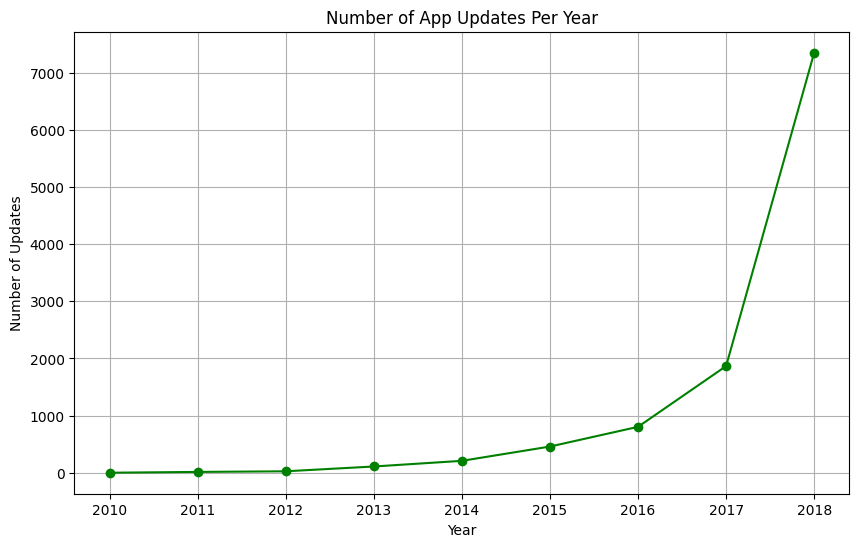

In [132]:
plt.figure(figsize=(10,6))
plt.plot(updates_per_year.index, updates_per_year.values, marker='o', color='green')
plt.title('Number of App Updates Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Updates')
plt.grid(True)
plt.show()

3.How does the average rating of apps change with the number of installs? Create a binned analysis.


In [133]:
bins = [0, 1000, 10000, 100000, 500000, 1000000, 5000000, 10000000, 50000000, 100000000, 1000000000]
labels = ['0-1k','1k-10k','10k-100k','100k-500k','500k-1M','1M-5M','5M-10M','10M-50M','50M-100M','100M-1B']

In [134]:
df['Installs_Bin'] = pd.cut(df['Installs'], bins=bins, labels=labels)

In [136]:
avg_rating_per_bin = df.groupby('Installs_Bin', observed=True)['Rating'].mean()


In [137]:
print(avg_rating_per_bin)

Installs_Bin
0-1k         4.248999
1k-10k       4.050555
10k-100k     4.106125
100k-500k    4.168460
500k-1M      4.220963
1M-5M        4.243218
5M-10M       4.313419
10M-50M      4.351211
50M-100M     4.411491
100M-1B      4.309231
Name: Rating, dtype: float64


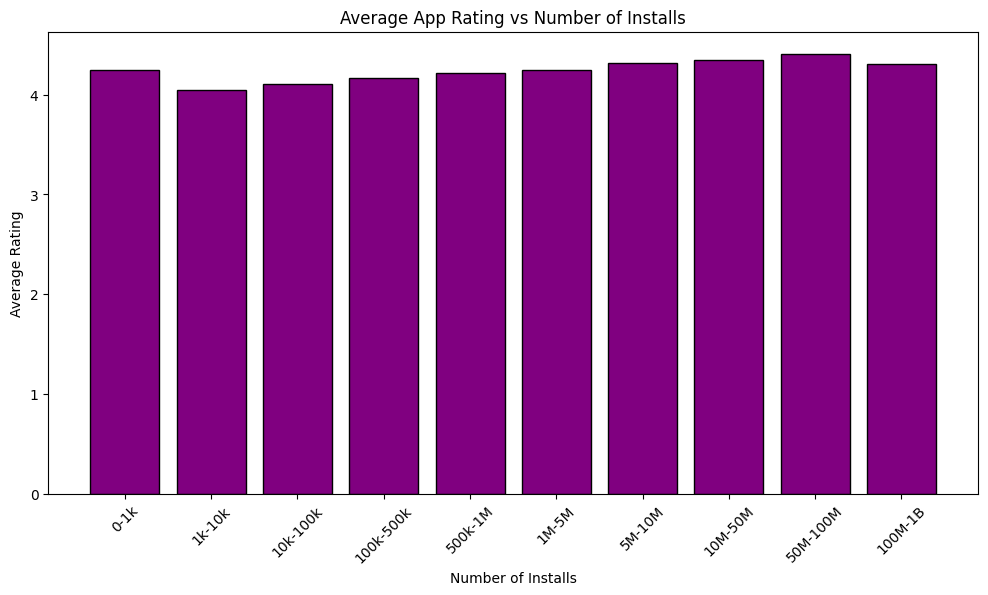

In [138]:
plt.figure(figsize=(12,6))
plt.bar(avg_rating_per_bin.index.astype(str), avg_rating_per_bin.values, color='purple', edgecolor='black')
plt.title('Average App Rating vs Number of Installs')
plt.xlabel('Number of Installs')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

4.Perform sentiment analysis on app reviews (if review text is available) to determine the common themes in high and low-rated apps.


In [156]:
high_rated = df[df['Rating'] >= 4.0]
low_rated = df[df['Rating'] < 4.0]

In [157]:
high_rated_reviews = high_rated['Reviews'].fillna(0)
low_rated_reviews = low_rated['Reviews'].fillna(0)

In [158]:
high_rated_installs = high_rated['Installs'].fillna(0)
low_rated_installs = low_rated['Installs'].fillna(0)

In [159]:
avg_reviews = [high_rated_reviews.mean(), low_rated_reviews.mean()]
avg_installs = [high_rated_installs.mean(), low_rated_installs.mean()]

In [160]:
total_apps = len(df)
percent_high = len(high_rated)/total_apps*100
percent_low = len(low_rated)/total_apps*100

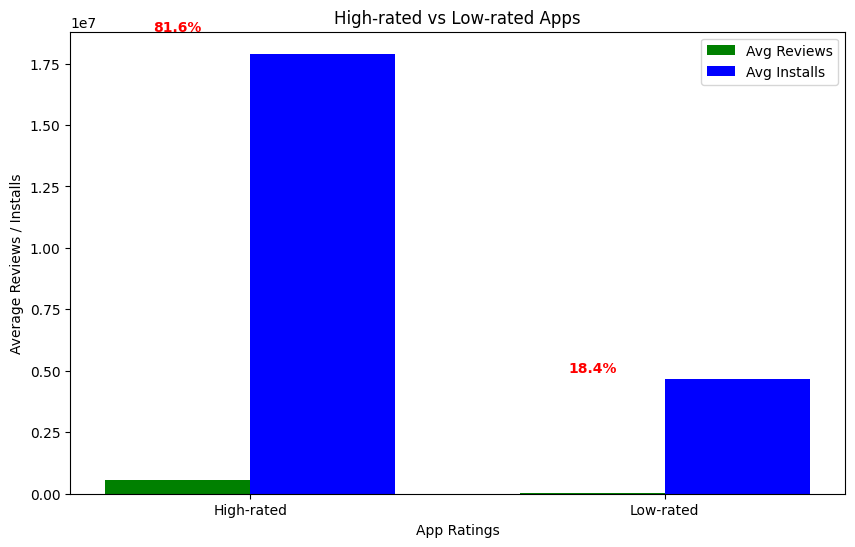

In [161]:
labels = ['High-rated', 'Low-rated']
x = np.arange(len(labels))


fig, ax = plt.subplots(figsize=(10,6))
bar_width = 0.35


bars1 = ax.bar(x, avg_reviews, bar_width, label='Avg Reviews', color='green')
bars2 = ax.bar(x + bar_width, avg_installs, bar_width, label='Avg Installs', color='blue')


ax.set_xlabel('App Ratings')
ax.set_ylabel('Average Reviews / Installs')
ax.set_title('High-rated vs Low-rated Apps')
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()


for i in range(len(labels)):
    ax.text(x[i], max(avg_reviews[i], avg_installs[i])*1.05, f'{percent_high if i==0 else percent_low:.1f}%', 
            ha='center', fontweight='bold', color='red')

plt.show()

5.What is the relationship between app genre and user ratings? Are certain genres consistently rated higher or lower?


In [162]:
df['Primary_Genre'] = df['Genres'].apply(lambda x: x.split(';')[0] if isinstance(x, str) else x)


In [163]:
genre_rating = df.groupby('Primary_Genre')['Rating'].mean().sort_values(ascending=False)

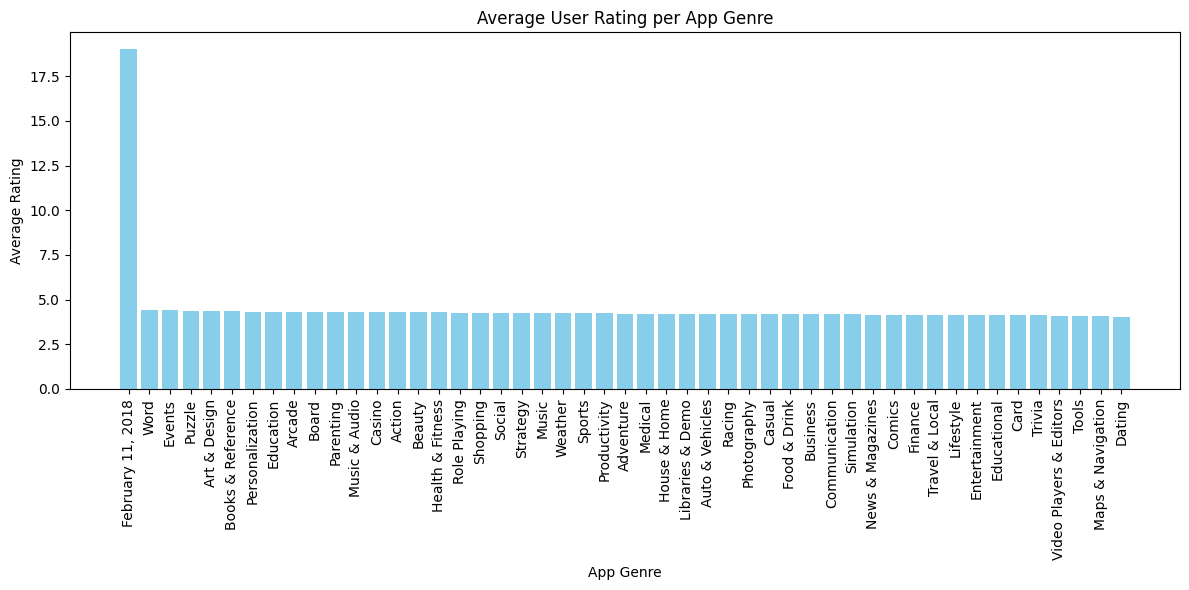

In [164]:
plt.figure(figsize=(12,6))
plt.bar(genre_rating.index, genre_rating.values, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('App Genre')
plt.ylabel('Average Rating')
plt.title('Average User Rating per App Genre')
plt.tight_layout()
plt.show()